# Adverse Childhood Experiences and Chronic Pain 

1. finding the correlation between ACE scores with Clarke scores
2. plotting the correlation between ACE scores and Clarke scores
3. comparing Childhood validation scores of both healthy participants and chronic pain patients
4. finding the correlation between pain levels and Clarke scores
5. comparing the correlation between pain levels and Clarke vs. ACE scores.

First, I load in data. This graph plots the distribution of ACE scores of both patients and controls


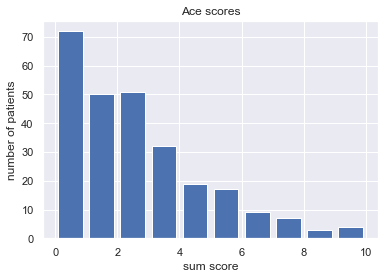

In [20]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Oct 28 11:58:26 2018

@author: Nola
"""

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy as sp

sns.set(style="darkgrid")

#df = pd.read_csv('/Users/Nola/desktop/ACE+clarkepatientscopy.csv', sep=',',header=0)
#dh = pd.read_csv('/Users/Nola/desktop/ACE+clarkehealthies.csv', sep=',',header=0)
df = pd.read_csv('/Users/Nola/dropbox/ACE back pain/data/Combined_complete_data.csv', sep=',',header=0)

df.dropna(subset=['clarke_ace'], inplace=True)


df.drop(['record_id', 'redcap_event_name', 'aceclarke_timestamp','aceclarke_complete'], axis=1, inplace=True)
# create ACE scores by summing across ACE items
df['ace_scores'] = df[['ace1','ace2','ace3', 'ace4','ace5','ace6', 'ace7','ace8','ace9','ace10']].sum(axis=1)                  

# plot distribution of ace scores
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.hist(df['ace_scores'], bins, histtype='bar', rwidth=0.8)                  
#data.plot(kind='bar')
plt.ylabel('number of patients')
plt.xlabel('sum score')
plt.title('Ace scores')
plt.show()


### Create a Jointplot of the correlation between ACE and Clarke scores

/Users/Nola/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


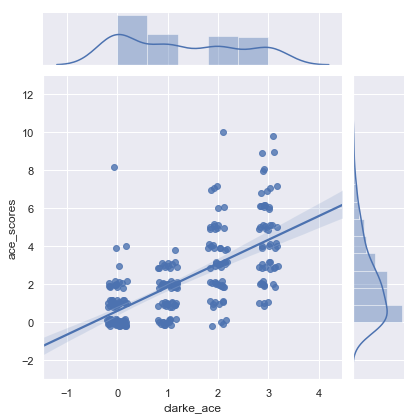

In [6]:
g = sns.jointplot("clarke_ace", "ace_scores", data=df, kind="reg", x_jitter=.2, y_jitter=.2)

## Correlation between ace and clarke

In [25]:
sp.stats.spearmanr(df['ace_scores'], df['clarke_ace'])

SpearmanrResult(correlation=0.6943663359705453, pvalue=2.5724722690602228e-39)

## Create a violin plot in order to compare the ACE and Clarke Scores of Patients (1) and Healthies (2)

/Users/Nola/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


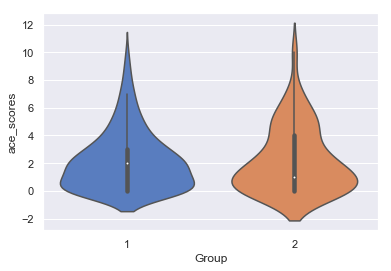

In [9]:
ax = sns.violinplot(x="Group", y="ace_scores", data=df, palette="muted", jitter=True)

### Conduct a T-test to test for group differences. However, this is an invalid ttest when distributions are not normal, like ours. We are able to look at the data and see there is little difference.

In [10]:
patients = df[df['Group']==1]
healthies = df[df['Group']==2]
sp.stats.ttest_ind(patients['ace_scores'], healthies['ace_scores'])

Ttest_indResult(statistic=-0.12446886547054026, pvalue=0.9010394928665093)

/Users/Nola/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


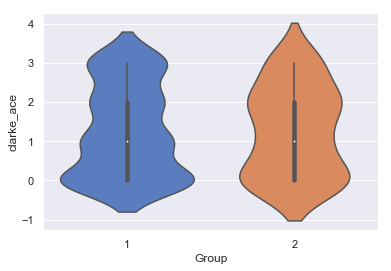

In [11]:
ax = sns.violinplot(x="Group", y="clarke_ace", data=df, palette="muted")

In [12]:
patients = df[df['Group']==1]
healthies = df[df['Group']==2]
sp.stats.ttest_ind(patients['clarke_ace'], healthies['clarke_ace'])

Ttest_indResult(statistic=-0.04642663244992532, pvalue=0.96300557727775)

## Correlation of pain and Clarke Scores
### Using the average of worst, least, average, and current pain for the following correlations  

In [21]:
df['pain'] = df[['pain_worst', 'pain_least', 'pain_avg', 'pain_now']].mean(axis=1)
sp.stats.spearmanr(df['pain'], df['clarke_ace'])

SpearmanrResult(correlation=0.039742985046337796, pvalue=0.5202650108931921)

/Users/Nola/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


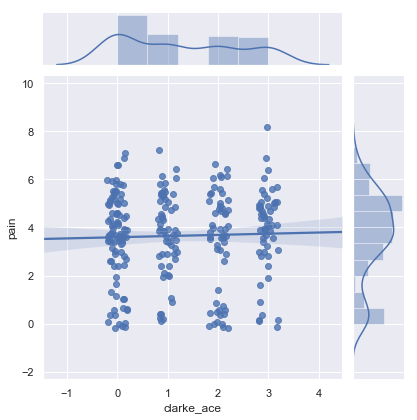

In [22]:
df['pain'] = df[['pain_worst', 'pain_least', 'pain_avg', 'pain_now']].mean(axis=1)
g = sns.jointplot("clarke_ace", "pain", data=df, kind="reg", x_jitter=.2, y_jitter=.2)

## Correlation of pain and ACE Scores
### Using the average of worst, least, average, and current pain for the following correlations  

In [23]:
sp.stats.spearmanr(df['ace_scores'], df['pain'])                                 

SpearmanrResult(correlation=0.04449411021596881, pvalue=0.47160515615982435)

/Users/Nola/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


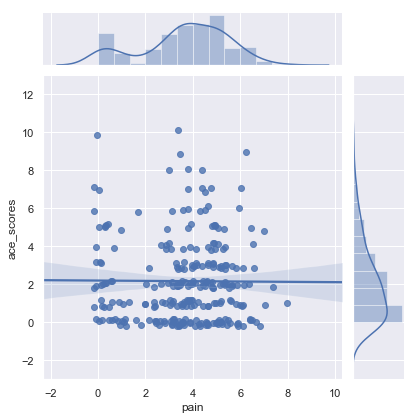

In [24]:
df['pain'] = df[['pain_worst', 'pain_least', 'pain_avg', 'pain_now']].mean(axis=1)
g = sns.jointplot("pain", "ace_scores", data=df, kind="reg", x_jitter=.2, y_jitter=.2)